In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

## Reading the handwritten dataset

In [2]:
from keras.datasets import mnist
(xtrain, ytrain), (xtest, ytest) = mnist.load_data()

In [3]:
ytrain.shape

(60000,)

In [4]:
xtrain.shape

(60000, 28, 28)

In [5]:
xtest.shape

(10000, 28, 28)

In [6]:
xtrain

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [7]:
ytrain

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

## Viewing first image from train data

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

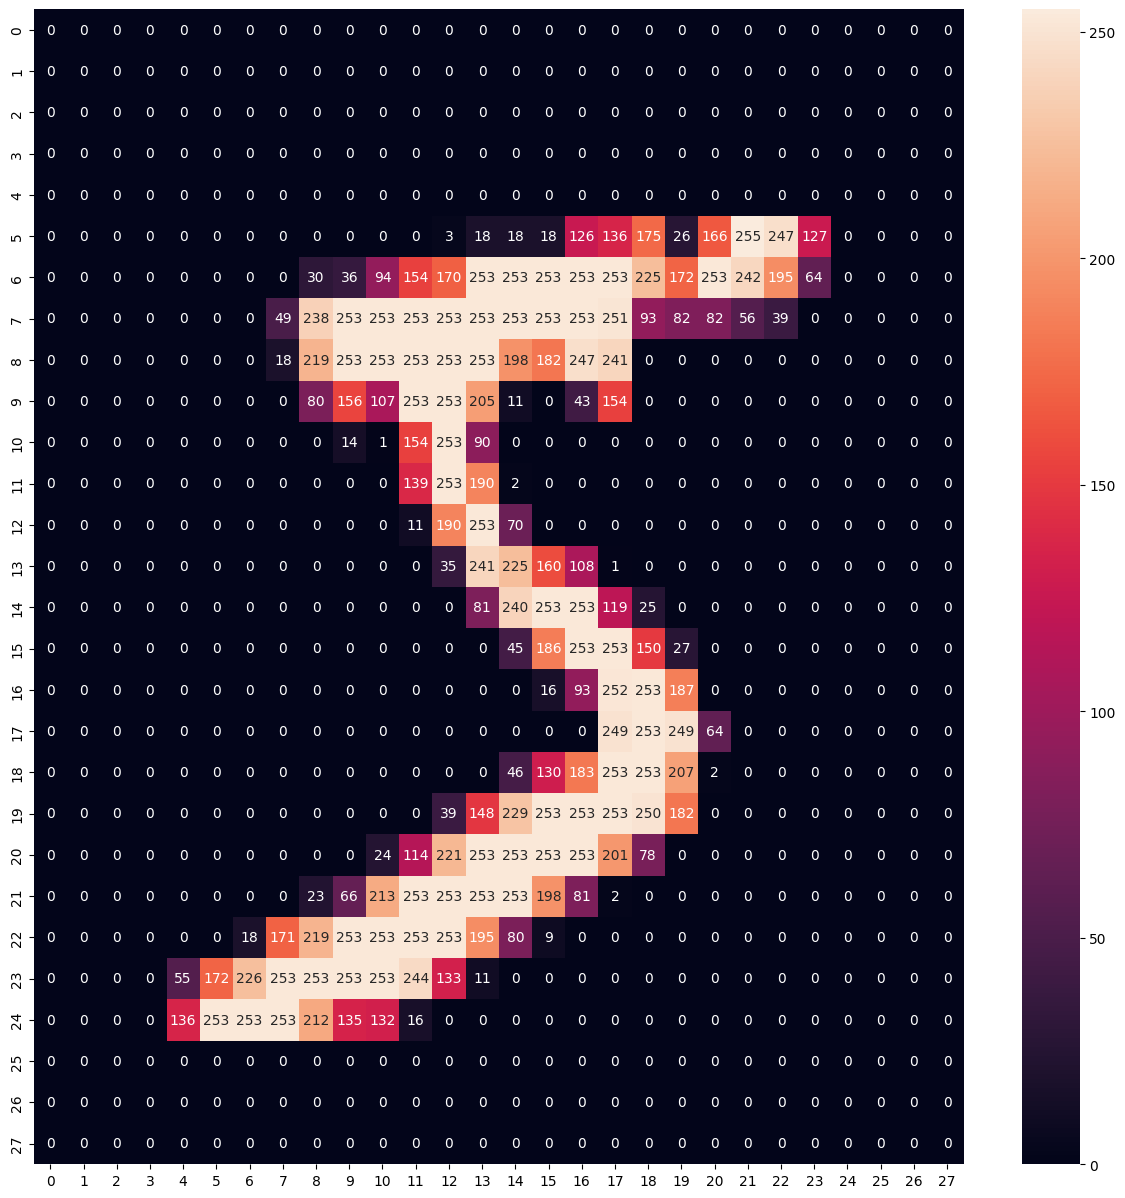

In [9]:
plt.figure(figsize=(15,15))
sns.heatmap(xtrain[0], annot=True, fmt='d')
plt.show()

In [10]:
ytrain[0]

5

In [11]:
xtrain[0].shape

(28, 28)

## Visualize top 9 image from the xtrain data

In [12]:
for i in range(9):
    print(i)

0
1
2
3
4
5
6
7
8


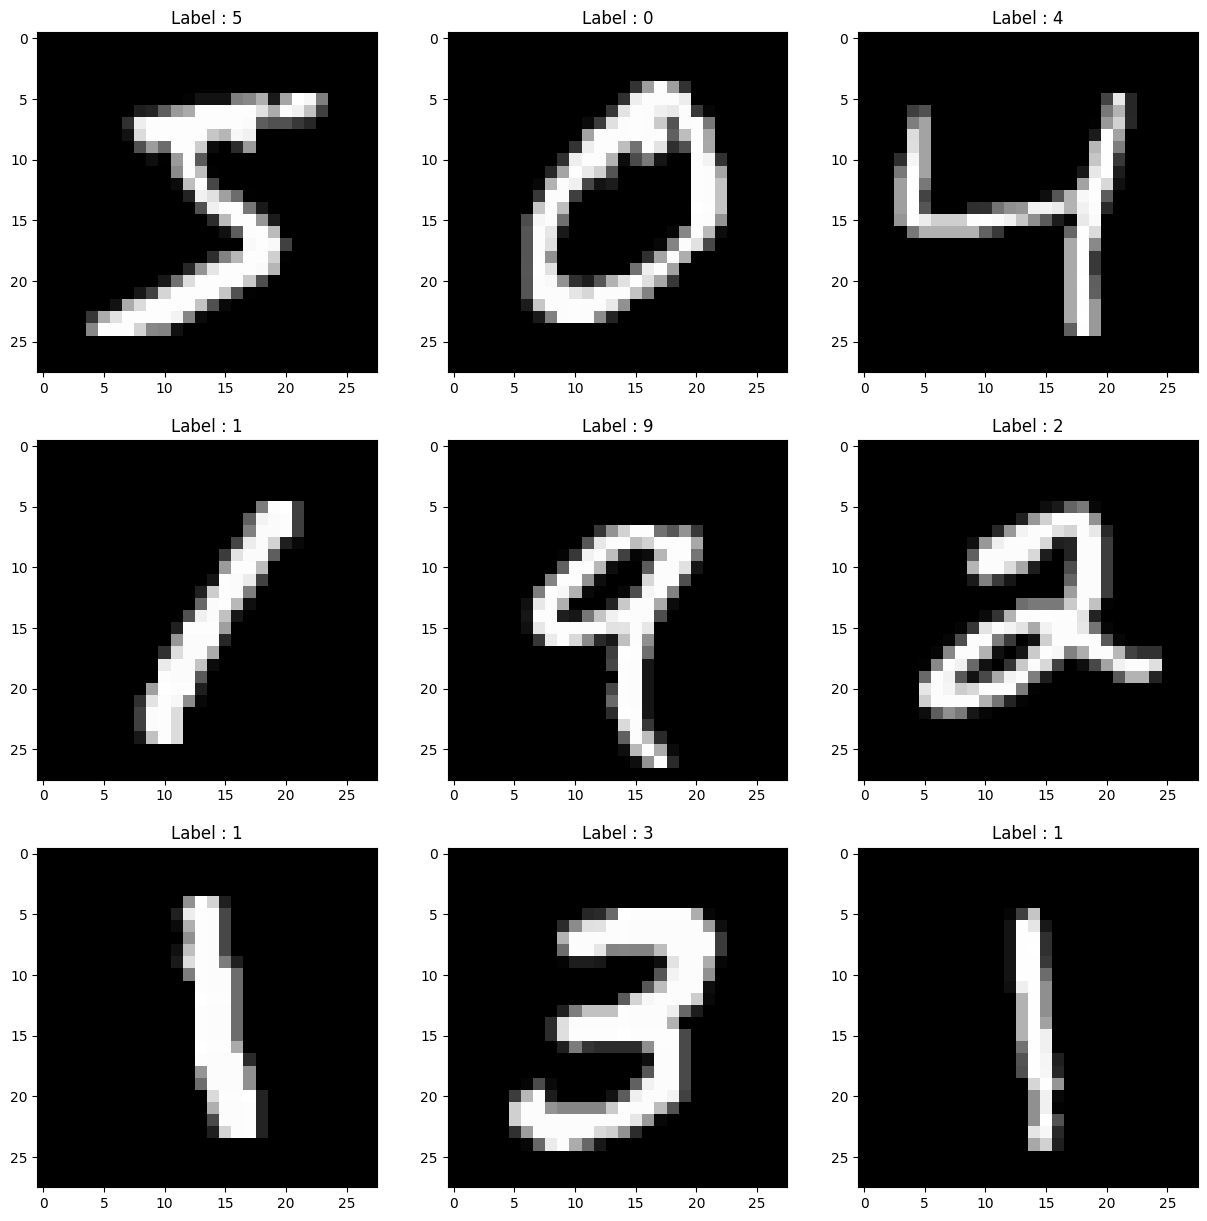

In [13]:
plt.figure(figsize=(15,15))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(xtrain[i], cmap='gray')
    plt.title(f'Label : {ytrain[i]}')

In [14]:
import numpy as np
np.unique(ytrain)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

## This is multiclass classification because having more than two classes

## Preprocessing the data

In [15]:
#scale the x data divided by 255(because max size of pixel is 255)
xtrain_scl = xtrain.astype('float32')/255
xtest_scl = xtest.astype('float32')/255

In [16]:
xtrain_scl

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [17]:
#Apply one hot encoding on Y data because of multiclass classification
from keras.utils import to_categorical
ytrain_cat = to_categorical(ytrain)
ytest_cat = to_categorical(ytest)

In [18]:
ytrain_cat[0:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [19]:
ytrain[0:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [20]:
ytest_cat[0:5]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [21]:
ytest[0:5]

array([7, 2, 1, 0, 4], dtype=uint8)

## Create a simple Covnet

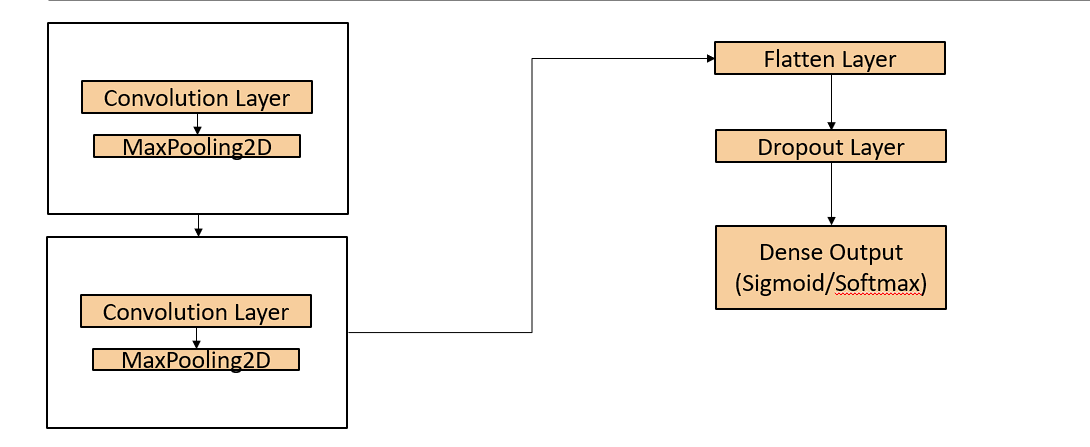

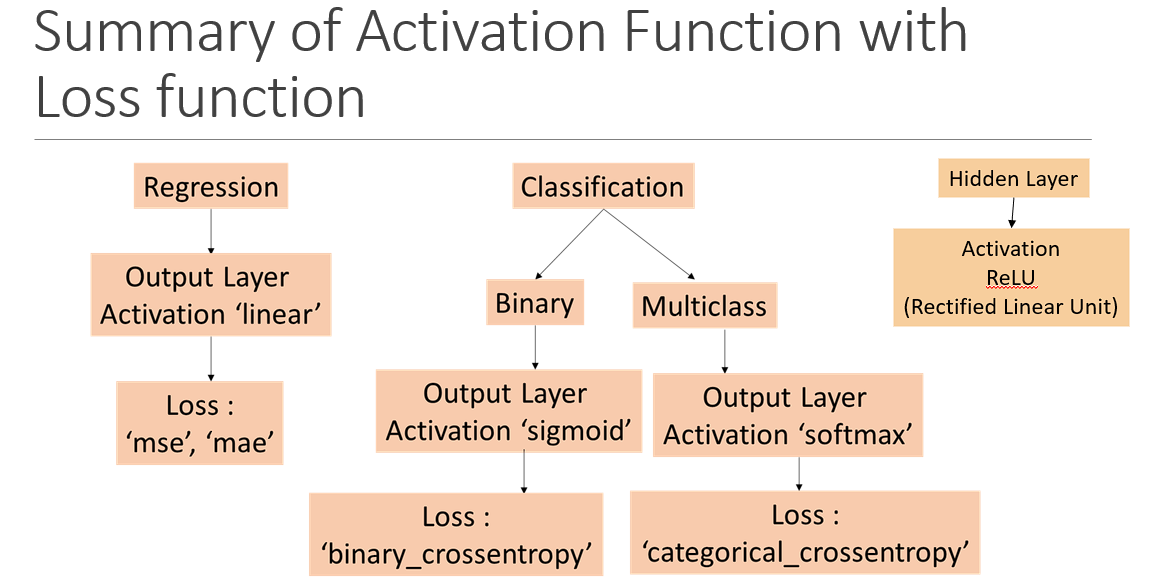

In [22]:
from keras.models import Sequential
from keras.layers import Input, Dense, Dropout, Conv2D, MaxPool2D, Flatten

In [23]:
model = Sequential()

#add impute layer
model.add(Input(shape=(28, 28, 1)))
#add convolutin layer 1
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
#add Maxpooling 1
model.add(MaxPool2D(pool_size=(2, 2)))
#add convolution layer 2
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
#add Maxpooling 2
model.add(MaxPool2D(pool_size=(2,2)))
#add flatten layer
model.add(Flatten())
#add dropout layer
model.add(Dropout(rate=0.5))
#add Dense layer multiclass - softmax
model.add(Dense(units=10, activation='softmax'))

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

## Compile the model

In [25]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics='accuracy')

## Train the neural network

In [26]:
hist = model.fit(xtrain_scl, ytrain_cat, validation_split=0.1, epochs=15)

Epoch 1/15


1688/1688 [==============================] - 16s 8ms/step - loss: 0.2233 - accuracy: 0.9319 - val_loss: 0.0638 - val_accuracy: 0.9817
Epoch 2/15
1688/1688 [==============================] - 12s 7ms/step - loss: 0.0831 - accuracy: 0.9734 - val_loss: 0.0407 - val_accuracy: 0.9887
Epoch 3/15
1688/1688 [==============================] - 12s 7ms/step - loss: 0.0644 - accuracy: 0.9800 - val_loss: 0.0339 - val_accuracy: 0.9910
Epoch 4/15
1688/1688 [==============================] - 12s 7ms/step - loss: 0.0566 - accuracy: 0.9823 - val_loss: 0.0308 - val_accuracy: 0.9908
Epoch 5/15
1688/1688 [==============================] - 11s 7ms/step - loss: 0.0477 - accuracy: 0.9853 - val_loss: 0.0329 - val_accuracy: 0.9903
Epoch 6/15
1688/1688 [==============================] - 11s 7ms/step - loss: 0.0447 - accuracy: 0.9852 - val_loss: 0.0314 - val_accuracy: 0.9913
Epoch 7/15
1688/1688 [==============================] - 12s 7ms/step - loss: 0.0421 - accuracy: 0.9865 - val_loss: 0.0330 - val_

## Ploting the learing curve

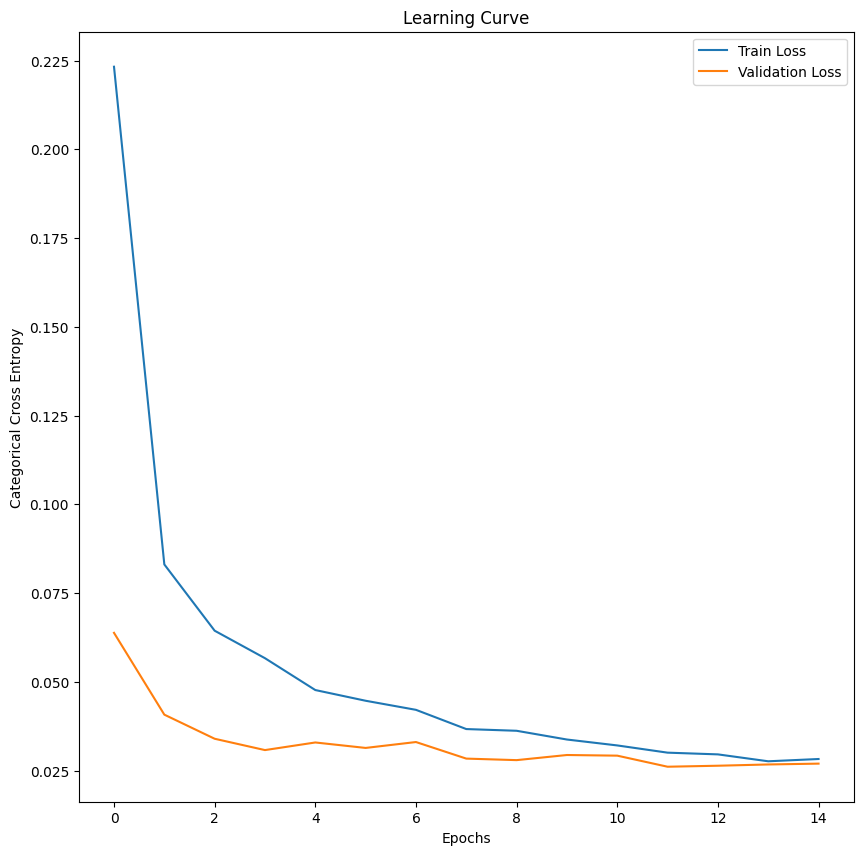

In [27]:
plt.figure(figsize=(10,10))
plt.plot(hist.history['loss'], label='Train Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Categorical Cross Entropy')
plt.title('Learning Curve')
plt.legend()
plt.show()

## evaluate the model in train and test

In [28]:
model.evaluate(xtrain_scl, ytrain_cat)

1875/1875 [==============================] - 6s 3ms/step - loss: 0.0104 - accuracy: 0.9970


[0.010369645431637764, 0.996999979019165]

In [29]:
model.evaluate(xtest_scl, ytest_cat)

313/313 [==============================] - 1s 3ms/step - loss: 0.0231 - accuracy: 0.9927


[0.023063546046614647, 0.9926999807357788]

## predict the probability for train and test

In [30]:
yprob_tr = model.predict(xtrain_scl)
yprob_ts = model.predict(xtest_scl)

313/313 [==============================] - 1s 3ms/step


In [31]:
yprob_tr[0:5]

array([[6.20513710e-12, 1.53944790e-09, 1.56000213e-10, 1.17736068e-02,
        1.74740420e-12, 9.88215327e-01, 1.39293958e-12, 3.87555303e-07,
        5.17724686e-07, 1.03022030e-05],
       [9.99998927e-01, 1.58422806e-15, 1.10302722e-06, 2.36307328e-12,
        1.60104777e-11, 5.35350844e-12, 7.88838594e-09, 1.01670235e-11,
        2.99599612e-09, 5.92131961e-08],
       [2.90206956e-15, 1.50766834e-06, 7.97751554e-09, 1.40097067e-09,
        9.99845624e-01, 3.09222814e-10, 1.08929944e-12, 1.51339322e-04,
        5.87956279e-08, 1.49029825e-06],
       [2.32800623e-08, 9.99988317e-01, 2.65164090e-07, 4.35095779e-11,
        8.49012031e-06, 3.16895910e-09, 5.44257084e-08, 1.61113462e-06,
        1.13411977e-06, 6.00345107e-09],
       [1.33202943e-12, 5.50606158e-11, 1.48761037e-09, 4.80906537e-10,
        1.72706510e-04, 9.14322923e-11, 4.01986971e-15, 7.59873558e-07,
        1.84568289e-05, 9.99808133e-01]], dtype=float32)

In [32]:
yprob_tr[0]

array([6.2051371e-12, 1.5394479e-09, 1.5600021e-10, 1.1773607e-02,
       1.7474042e-12, 9.8821533e-01, 1.3929396e-12, 3.8755530e-07,
       5.1772469e-07, 1.0302203e-05], dtype=float32)

## Predictions for train and test

In [34]:
ypred_tr = np.argmax(yprob_tr, axis=1)
ypred_ts = np.argmax(yprob_ts, axis=1)

In [35]:
ypred_tr[0:5]

array([5, 0, 4, 1, 9], dtype=int64)

In [36]:
ytrain[0:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [37]:
ypred_ts[0:5]

array([7, 2, 1, 0, 4], dtype=int64)

In [38]:
ytest[0:5]

array([7, 2, 1, 0, 4], dtype=uint8)

## plot the confusion metrix

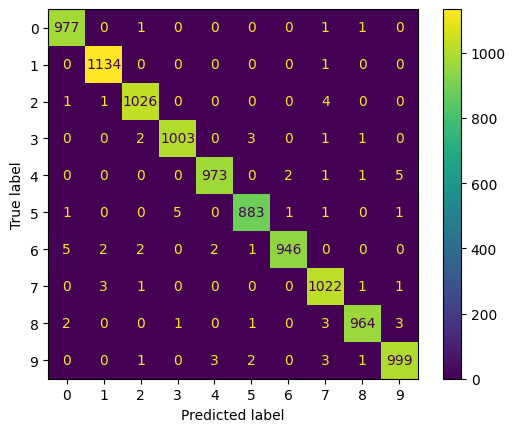

In [39]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cf = confusion_matrix(ytest, ypred_ts)
cfd = ConfusionMatrixDisplay(cf)
cfd.plot()

## Print the classifciation report

In [40]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_ts))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



## Save the keras model for future uses

In [41]:
model.save('HandwrittenModel.keras')

## Load the model

In [43]:
from keras.models import load_model
ld = load_model('HandwrittenModel.keras')
ld.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0